In [3]:
from openai import OpenAI
import pandas as pd
df = pd.read_csv('verbs3.csv')
client = OpenAI()

def p2_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {"role": "system", "content": 
                "نتا خبير فلهجة الدارجة المغربية وفالترجمة من الدارجة لنجليزية. " + 
                "غادي نعطيك واحد الفعل بالدارجة المغربية، والمهمة ديالك هي تترجمو لفعل انجليزي مجرد المصدر. " +
                "الترجمة خص يكون فيها غير جذر الفعل المترجم بلا تفسيرات."            
             },
            {"role": "user", "content": "شرب"},
            {"role": "assistant", "content": "drink"},
            {"role": "user", "content":  f'{verb}' }
        ],
        temperature=0
    )
    return completion.choices[0].message.content
def eng_p2_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {"role": "system", "content": 
             "You are an expert in Language translation from Moroccan Darija dialect to English. " +
             "You will be provided with a verb in Moroccan Darija language, and your task is to translate it into a bare-infinitive English verb. " +
             "The translation must contain only the lemma of the translated verb with no explanations."},
            {"role": "user", "content": "شرب"},
            {"role": "assistant", "content": "drink"},
            {"role": "user", "content": f"{verb}"}
        ],
        temperature=0
    )
    return completion.choices[0].message.content

def p3_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {"role": "system", "content": 
                "نتا خبير فلهجة الدارجة المغربية وفالترجمة من الدارجة لنجليزية. " + 
                "غادي نعطيك واحد الفعل بالدارجة المغربية، والمهمة ديالك هي تترجمو لفعل انجليزي مجرد المصدر. " +
                "الترجمة خص يكون فيها غير جذر الفعل المترجم بلا تفسيرات."            
             },
            {"role": "user", "content": "شرب"},
            {"role": "assistant", "content": "drink"},
            {"role": "user", "content": "ستدعا"},
            {"role": "assistant", "content": "summon"},
            {"role": "user", "content": "طفا"},
            {"role": "assistant", "content": "turn off"},
            {"role": "user", "content":  f'{verb}' }
        ],
        temperature=0
    )
    return completion.choices[0].message.content
def eng_p3_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {"role": "system", "content": 
             "You are an expert in Language translation from Moroccan Darija dialect to English. " +
             "You will be provided with a verb in Moroccan Darija language, and your task is to translate it into a bare-infinitive English verb. " +
             "The translation must contain only the lemma of the translated verb with no explanations."},
            {"role": "user", "content": "شرب"},
            {"role": "assistant", "content": "drink"},
            {"role": "user", "content": "ستدعا"},
            {"role": "assistant", "content": "summon"},
            {"role": "user", "content": "طفا"},
            {"role": "assistant", "content": "turn off"},
            {"role": "user", "content":  f'{verb}' }
        ],
        temperature=0
    )
    return completion.choices[0].message.content
df.columns


Index(['darija_ar', 'eng', 'p1_transl', 'eng_p1_transl', 'p2_transl',
       'eng_p2_transl', 'p3_transl', 'eng_p3_transl'],
      dtype='object')

In [5]:
dataset = df.copy()
columns_to_delete = ['p1_transl', 'eng_p1_transl',  'p3_transl', 'eng_p3_transl']
dataset.drop(columns=columns_to_delete, inplace=True)

dataset.columns = ['darija_ar', 'eng', 'p1_transl', 'eng_p1_transl']

dataset.columns

Index(['darija_ar', 'eng', 'p1_transl', 'eng_p1_transl'], dtype='object')

In [6]:

dataset['p2_transl'] = dataset['darija_ar'].apply(p2_translate_)
dataset['eng_p2_transl'] = dataset['darija_ar'].apply(eng_p2_translate_)
dataset['p3_transl'] = dataset['darija_ar'].apply(p3_translate_)
dataset['eng_p3_transl'] = dataset['darija_ar'].apply(eng_p3_translate_)

8H

In [1]:
dataset.to_csv('verbs5.csv', index=False)
print(dataset)  

NameError: name 'dataset' is not defined

In [1]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
import pandas as pd
dataset = pd.read_csv('verbs5.csv')

eng = dataset['eng']
eng = [verb.replace(" ", "_") for verb in eng]
p1_transl = dataset['p1_transl']
eng_p1_transl = dataset['eng_p1_transl']
p2_transl = dataset['p2_transl']
eng_p2_transl = dataset['eng_p2_transl']
p3_transl = dataset['p3_transl']
eng_p3_transl = dataset['eng_p3_transl']


p1_transl = [verb.replace(" ", "_") for verb in p1_transl]
eng_p1_transl = [verb.replace(" ", "_") for verb in eng_p1_transl]
p2_transl = [verb.replace(" ", "_") for verb in p2_transl]
eng_p2_transl = [verb.replace(" ", "_") for verb in eng_p2_transl]
p3_transl = [verb.replace(" ", "_") for verb in p3_transl]
eng_p3_transl = [verb.replace(" ", "_") for verb in eng_p3_transl]

def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score

def evaluate_pairs(transl,threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results



results_p1 = evaluate_pairs(p1_transl)
results_eng_p1 = evaluate_pairs(eng_p1_transl)
results_p2 = evaluate_pairs(p2_transl)
results_eng_p2 = evaluate_pairs(eng_p2_transl)
results_p3 = evaluate_pairs(p3_transl)
results_eng_p3 = evaluate_pairs(eng_p3_transl)


dataset['similarity_p1'] = [item[2] for item in results_p1]
dataset['similarity_eng_p1'] = [item[2] for item in results_eng_p1]
dataset['similarity_p2'] = [item[2] for item in results_p2]
dataset['similarity_eng_p2'] = [item[2] for item in results_eng_p2]
dataset['similarity_p3'] = [item[2] for item in results_p3]
dataset['similarity_eng_p3'] = [item[2] for item in results_eng_p3]



p1_s = dataset['similarity_p1']
ep1_s = dataset['similarity_eng_p1']
p1= dataset['similarity_p1'].mean()
ep1= dataset['similarity_eng_p1'].mean()

p2_s = dataset['similarity_p2']
ep2_s = dataset['similarity_eng_p2']
p2= dataset['similarity_p2'].mean()
ep2= dataset['similarity_eng_p2'].mean()

p3_s = dataset['similarity_p3']
ep3_s = dataset['similarity_eng_p3']
p3= dataset['similarity_p3'].mean()
ep3= dataset['similarity_eng_p3'].mean()


print(f'Mean value of similarities in the first darija prompt is: {p1}')
print(f'Mean value of similarities in the first english prompt is: {ep1}')
print(f'Mean value of similarities in the second darija prompt is: {p2}')
print(f'Mean value of similarities in the second english prompt is: {ep2}')
print(f'Mean value of similarities in the third darija prompt is: {p3}')
print(f'Mean value of similarities in the second english prompt is: {ep3}')
dataset.describe()

Mean value of similarities in the first darija prompt is: 0.5908058913308915
Mean value of similarities in the first english prompt is: 0.5937832722832722
Mean value of similarities in the second darija prompt is: 0.6057971972471973
Mean value of similarities in the second english prompt is: 0.6133257326007326
Mean value of similarities in the third darija prompt is: 0.6242685897435897
Mean value of similarities in the second english prompt is: 0.6192130702630703


,similarity_p1,similarity_eng_p1,similarity_p2,similarity_eng_p2,similarity_p3,similarity_eng_p3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.590806,0.593783,0.605797,0.613326,0.624269,0.619213
std,0.377403,0.382532,0.366194,0.361455,0.364978,0.361105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Box(y=dataset['similarity_p1'], name='Darija first prompt'))
fig.add_trace(go.Box(y=dataset['similarity_eng_p1'], name='english first prompt'))
fig.add_trace(go.Box(y=dataset['similarity_p2'], name='darija second prompt'))
fig.add_trace(go.Box(y=dataset['similarity_eng_p2'], name='english second prompt'))
fig.add_trace(go.Box(y=dataset['similarity_p3'], name='darija third prompt'))
fig.add_trace(go.Box(y=dataset['similarity_eng_p3'], name='english third prompt'))

# Update layout
fig.update_layout(
    title='Box Plot of Similarity Scores for all the prompts.',
    yaxis_title='Similarity Score',
    xaxis_title='Prompt',
    boxmode='group'  # group the box plots together
)

# Show plot
fig.show()

In [3]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p1'], x=dataset['similarity_p1'], name="Count of similarities in first Darija prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p2'], x=dataset['similarity_p2'], name="Count of similarities in second Darija prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p3'], x=dataset['similarity_p3'], name="Count of similarities in third Darija prompt"))

fig.show()

In [4]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p1'], x=dataset['similarity_eng_p1'], name="Count of similarities in first English prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p2'], x=dataset['similarity_eng_p2'], name="Count of similarities in second English prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p3'], x=dataset['similarity_eng_p3'], name="Count of similarities in third English prompt"))

fig.show()

In [5]:
from scipy.stats import ttest_ind, ttest_rel


# Interpretation
def ind_t_test(groups, percentage1, percentage2):
    t_stat, p_value = ttest_ind(percentage1, percentage2)
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print(f"The difference between the two sets of path similarity percentages between {groups} is statistically significant.\n")
    else:
        print(f"The difference between the two sets of path similarity percentages between {groups} is not statistically significant.\n")

def paired_t_test(groups, percentage1, percentage2):
    t_stat, p_value = ttest_rel(percentage1, percentage2)
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print(f"The difference between the two sets of path similarity percentages between {groups} is statistically significant.\n")
    else:
        print(f"The difference between the two sets of path similarity percentages between {groups} is not statistically significant.\n")

groups1 = 'English and Darija in the first prompt'
groups2 = 'English and Darija in the second prompt'
groups3 = 'English and Darija in the third prompt'

groups4 = 'Darija first and second prompt'
groups5 = 'Darija second and third prompt'

groups6 = 'English first and second prompt'
groups7 = 'Englsih second and third prompt'

ind_t_test(groups1,p1_s,ep1_s)
ind_t_test(groups2,p2_s,ep2_s)
ind_t_test(groups3,p3_s,ep3_s)

paired_t_test(groups4,p1_s,p2_s)
paired_t_test(groups5,p2_s,p3_s)

paired_t_test(groups6,ep1_s,ep2_s)
paired_t_test(groups7,ep2_s,ep3_s)


T-statistic: -0.17521163856712688
P-value: 0.8609310930999269
The difference between the two sets of path similarity percentages between English and Darija in the first prompt is not statistically significant.

T-statistic: -0.46269436197514496
P-value: 0.6436338458440132
The difference between the two sets of path similarity percentages between English and Darija in the second prompt is not statistically significant.

T-statistic: 0.3113784608503433
P-value: 0.755545411080899
The difference between the two sets of path similarity percentages between English and Darija in the third prompt is not statistically significant.

T-statistic: -1.9845315888973776
P-value: 0.04746984785918884
The difference between the two sets of path similarity percentages between Darija first and second prompt is statistically significant.

T-statistic: -2.6690549329497966
P-value: 0.007729823754537268
The difference between the two sets of path similarity percentages between Darija second and third prompt i

similarity_p3  0.000000  0.071429  0.076923  0.083333  0.100000  0.125000  \
similarity_p2                                                               
0.000000              4         0         0         0         0         0   
0.076923              0         0         1         0         0         0   
0.083333              0         0         0         1         0         0   
0.090909              0         0         0         0         0         0   
0.111111              0         0         0         0         0         0   
0.125000              0         0         0         0         0         6   
0.142857              1         0         0         0         0         2   
0.166667              1         0         0         0         1         0   
0.200000              2         0         0         1         1         2   
0.250000              3         0         0         0         0         1   
0.333333              0         1         0         0         0         0   

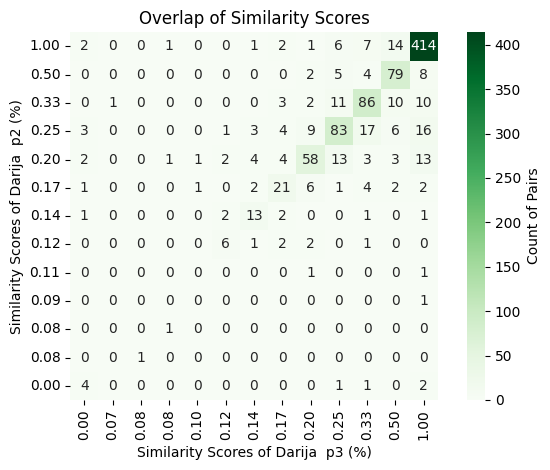

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset['triple_verbs'] = dataset['eng'] + ', ' + dataset['p1_transl'] + ', ' + dataset['eng_p1_transl']

# Add Index Column
#dataset["index"] = dataset["eng"] + "-" + dataset["translations_prompt1"]
dataset["index"] = dataset["triple_verbs"]

dataset.set_index("index", inplace=True)

# Create Pivot Table
piv = pd.pivot_table(dataset, values="triple_verbs", index=["similarity_p2"], columns=["similarity_p3"], aggfunc='count', fill_value=0)
print(piv)


# Format similarity scores to two decimal places
piv.index = piv.index.map(lambda x: f'{x:.2f}')
piv.columns = piv.columns.map(lambda x: f'{x:.2f}')


ax = sns.heatmap(piv, square=True, annot=True, fmt="d", cbar_kws={'label': 'Count of Pairs'}, cmap="Greens")
plt.xlabel('Similarity Scores of Darija  p3 (%)')
plt.ylabel('Similarity Scores of Darija  p2 (%)')
plt.title('Overlap of Similarity Scores')
plt.gca().invert_yaxis()  # Reverse y-axis
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.show()


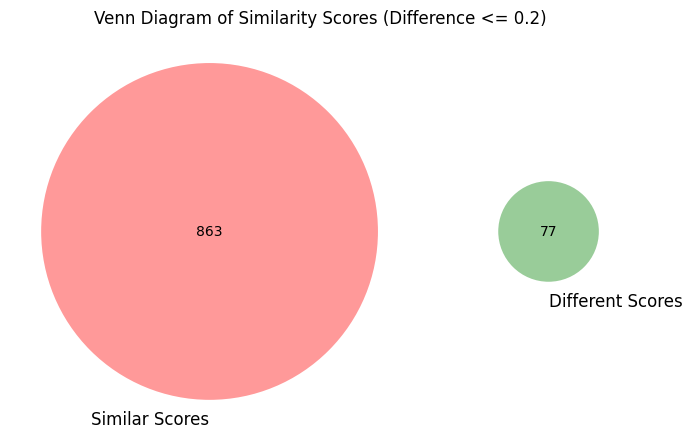

In [7]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

threshold = 0.4

# Determine sets based on the similarity difference threshold
set_prompt1 = set(dataset[(abs(dataset['similarity_p2'] - dataset['similarity_p3']) <= threshold)]['eng'])
set_prompt2 = set_prompt1  # Since we're comparing the same pairs

# Plot Venn diagram
plt.figure(figsize=(8, 6))
venn2([set_prompt1, set(dataset['eng']) - set_prompt1], ('Similar Scores', 'Different Scores'))
plt.title('Venn Diagram of Similarity Scores (Difference <= 0.2)')
plt.show()


454
1000
546
1000


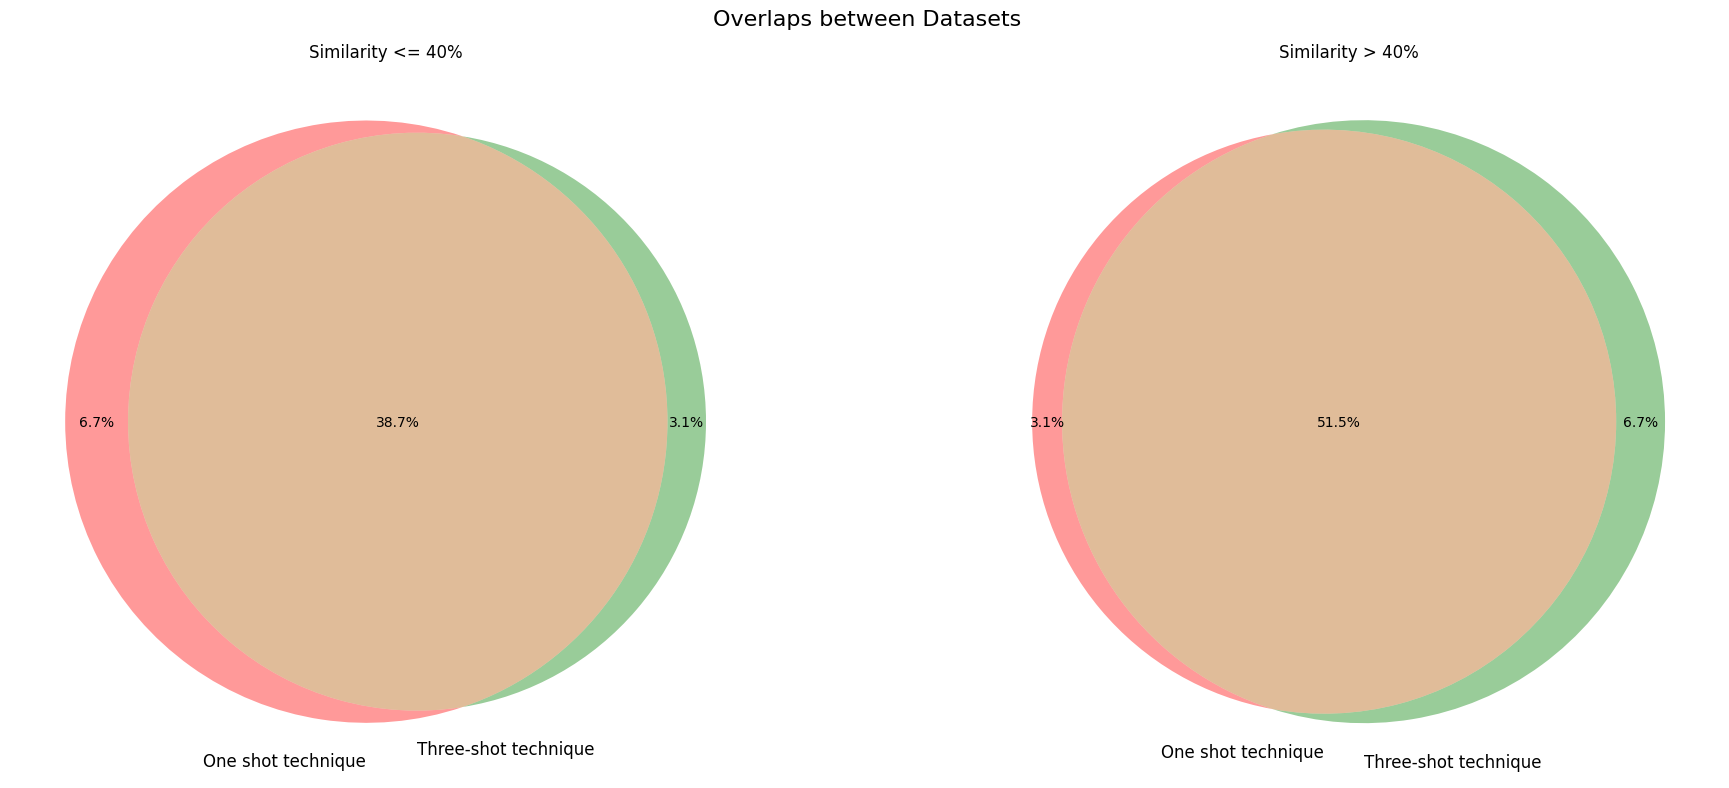

In [36]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from collections import Counter

# Define your datasets as sets
dataset1 = dataset[abs(dataset['similarity_p2']) <= threshold]['eng']
dataset2 = dataset[abs(dataset['similarity_p3']) <= threshold]['eng']
dataset3 = dataset[abs(dataset['similarity_p2']) > threshold]['eng']
dataset4 = dataset[abs(dataset['similarity_p3']) > threshold]['eng']

# Function to calculate Venn diagram data
def calculate_venn_data(set1, set2, set3):
    count1 = Counter(set1)
    count2 = Counter(set2)
    count3 = Counter(set3)
    total1 = sum(count1.values())
    print(total1)
    total2 = sum(count2.values())
    total3 = sum(count3.values())
    intersection = sum(min(count1[name], count2[name]) for name in set(count1) & set(count2))
    only1 = total1 - intersection
    only2 = total2 - intersection
    total = total1 + total3
    print(total)
    perc1 = only1 / total * 100
    perc2 = only2 / total * 100
    perc_inter = intersection / total * 100
    return (perc1, perc2, perc_inter)

# Function to create Venn diagram
def create_venn_diagram(ax, data, labels, title):
    venn = venn2(subsets=data, set_labels=labels, ax=ax)
    for subset in ('10', '01', '11'):
        label = venn.get_label_by_id(subset)
        if label:
            label.set_text(f'{float(label.get_text()):.1f}%')
    ax.set_title(title)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Calculate Venn diagram data for dataset1 and dataset2
data1 = calculate_venn_data(dataset1, dataset2, dataset3)
create_venn_diagram(ax1, data1, ('One shot technique', 'Three-shot technique'), 'Similarity <= 40%')

# Calculate Venn diagram data for dataset3 and dataset4
data2 = calculate_venn_data(dataset3, dataset4, dataset1)
create_venn_diagram(ax2, data2, ('One shot technique', 'Three-shot technique'), 'Similarity > 40%')

plt.suptitle("Overlaps between Datasets", fontsize=16)
plt.tight_layout()
plt.show()

In [10]:

filtered_pairs = dataset[(dataset['similarity_p3']== 1) & (dataset['similarity_p2'] < 0.11) & (dataset['similarity_p2'] > 0)]
print(filtered_pairs[['eng','p3_transl', 'p2_transl']])

                                  eng  p3_transl p2_transl
index                                                     
surrender, Deliver, Submit  surrender  surrender     thank




# {"role": "user", "content": "شرب"},
# {"role": "assistant", "content": "drink"},
# {"role": "user", "content": "ستدعا"},
# {"role": "assistant", "content": "summon"},
# {"role": "user", "content": "طفا"},
# {"role": "assistant", "content": "turn off"},
# {"role": "user", "content":  f'{verb}' }


#SYSTEM
#Answer in a consistent style.
#USER
#Teach me about patience.
#ASSISTANT
#The river that carves the deepest valley flows from a modest spring; the grandest symphony originates from a single note; the most intricate tapestry begins with a solitary thread.
#USER
#Teach me about the ocean.
